In [1]:
import pandas as pd
import os.path
import datetime
import BoW
from sklearn.model_selection import train_test_split
import string
from nltk.corpus import stopwords
from gensim.models import Word2Vec

In [2]:
# Data Loading
path = os.getcwd()
parent_folder, current_folder = os.path.split(path)
df = pd.read_csv(parent_folder + '/0.Raw_data/train/Combined_News_DJIA_train.csv')   # please check if Training data is in the same location on your PC

In [3]:
def cleaning(mess):
    """
    Takes in a string of text, then performs the following:
    1. Lower case of all words
    2. Remove all punctuation
    3. Remove all stopwords
    4. Returns a list of the cleaned text
    """

    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # Now just remove any stopwords
    return [word for word in nopunc.split() if word not in stopwords.words('english')]

In [4]:
# Data Cleaning and merging all headlines to one single column

df.iloc[:,2:27] = df.iloc[:,2:27].applymap(str)

# replace the b' and b" which are in the beginning of some headlines
df.iloc[:,2:27] = df.iloc[:,2:27].replace(regex="b'",value="")
df.iloc[:,2:27] = df.iloc[:,2:27].replace(regex='b"',value='')
df.iloc[:,2:27] = df.iloc[:,2:27].apply(lambda x: x.astype(str).str.lower())

#df1['lengths'] = df1['headlines'].apply(len)
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
for i in range(2,27):
    df.iloc[:,i] = df.iloc[:,i].apply(cleaning)

In [10]:

#df.to_csv('cleaned_tokenized.csv')

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0.0,"[georgia, downs, two, russian, warplanes, coun...",[nan],"[russia, today, columns, troops, roll, south, ...","[russian, tanks, moving, towards, capital, sou...","[afghan, children, raped, impunity, un, offici...","[150, russian, tanks, entered, south, ossetia,...","[breaking, georgia, invades, south, ossetia, r...","[enemy, combatent, trials, nothing, sham, sali...",...,"[georgia, invades, south, ossetia, russia, get...","[alqaeda, faces, islamist, backlash]","[condoleezza, rice, us, would, act, prevent, i...","[busy, day, european, union, approved, new, sa...","[georgia, withdraw, 1000, soldiers, iraq, help...","[pentagon, thinks, attacking, iran, bad, idea,...","[caucasus, crisis, georgia, invades, south, os...","[indian, shoe, manufactory, series, like, work]","[visitors, suffering, mental, illnesses, banne...","[help, mexicos, kidnapping, surge]"
1,2008-08-11,1.0,"[wont, america, nato, help, us, wont, help, us...","[bush, puts, foot, georgian, conflict]","[jewish, georgian, minister, thanks, israeli, ...","[georgian, army, flees, disarray, russians, ad...","[olympic, opening, ceremony, fireworks, faked]","[mossad, fraudulent, new, zealand, passports, ...","[russia, angered, israeli, military, sale, geo...","[american, citizen, living, sossetia, blames, ...",...,"[israel, us, behind, georgian, aggression]","[believe, tv, neither, russian, georgian, much...","[riots, still, going, montreal, canada, police...","[china, overtake, us, largest, manufacturer]","[war, south, ossetia, pics]","[israeli, physicians, group, condemns, state, ...","[russia, beaten, united, states, head, peak, oil]","[perhaps, question, georgia, russia, conflict]","[russia, much, better, war]",[nan]
2,2008-08-12,0.0,"[remember, adorable, 9yearold, sang, opening, ...","[russia, ends, georgia, operation]","[sexual, harassment, would, children]","[alqaeda, losing, support, iraq, brutal, crack...","[ceasefire, georgia, putin, outmaneuvers, west]","[microsoft, intel, tried, kill, xo, 100, laptop]","[stratfor, russogeorgian, war, balance, power]","[im, trying, get, sense, whole, georgiarussia,...",...,"[us, troops, still, georgia, know, georgia, fi...","[russias, response, georgia, right]","[gorbachev, accuses, us, making, serious, blun...","[russia, georgia, nato, cold, war, two]","[remember, adorable, 62yearold, led, country, ...","[war, georgia, israeli, connection]","[signs, point, us, encouraging, georgia, invad...","[christopher, king, argues, us, nato, behind, ...","[america, new, mexico]","[bbc, news, asiapacific, extinction, man, clim..."
3,2008-08-13,0.0,"[us, refuses, israel, weapons, attack, iran, r...","[president, ordered, attack, tskhinvali, capit...","[israel, clears, troops, killed, reuters, came...","[britains, policy, tough, drugs, pointless, sa...","[body, 14, year, old, found, trunk, latest, ra...","[china, moved, 10, million, quake, survivors, ...","[bush, announces, operation, get, russias, gri...","[russian, forces, sink, georgian, ships]",...,"[elephants, extinct, 2020]","[us, humanitarian, missions, soon, georgia, ru...","[georgias, ddos, came, us, sources]",[nan],"[israeli, defence, minister, us, strike, iran]","[gorbachev, choice]","[witness, russian, forces, head, towards, tbil...","[quarter, russians, blame, us, conflict, poll]","[georgian, president, says, us, military, take...","[2006, nobel, laureate, aleksander, solzhenits..."
4,2008-08-14,1.0,"[experts, admit, legalise, drugs]","[war, south, osetia, 89, pictures, made, russi...","[swedish, wrestler, ara, abrahamian, throws, a...","[russia, exaggerated, death, toll, south, osse...","[missile, killed, 9, inside, pakistan, may, la...","[rushdie, condemns, random, houses, refusal, p...","[poland, us, agree, missle, defense, deal, int...","[russians, conquer, tblisi, bet, seriously, bet]",...,"[bank, analyst, forecast, georgian, crisis, 2,...","[geo

In [7]:
X_train, X_val, y_train, y_val = train_test_split(df.loc[:, df.columns != 'Label'], df['Label'], test_size=0.20, random_state=42)

In [8]:
from gensim.models import Word2Vec

In [74]:
sentences = []
for i in range(1,26):
    sentences.extend(X_train.iloc[:,i].tolist())
    
len(sentences)

31675

(array([ 2997., 11350.,  6854.,  3828.,  2759.,  1929.,  1239.,   590.,
          117.,    12.]),
 array([ 1.,  5.,  9., 13., 17., 21., 25., 29., 33., 37., 41.]),
 <a list of 10 Patch objects>)

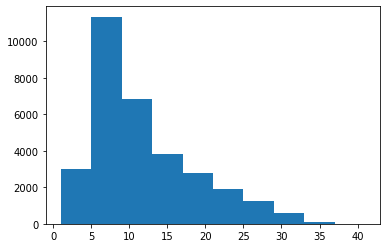

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist([len(x) for x in sentences])

In [101]:
temp = X_train['Top1'][552]

In [ ]:
def transform(wordlist):
    filtered_wl = [ word for word in wordlist if word in ??]
    return model.wv[fileterd_wl]
    

In [112]:
X_train['Top1'].apply(lambda x: model.wv[x])

KeyError: "word 'technologically' not in vocabulary"

In [105]:
model.wv[temp]

array([[-1.98779538e-01, -3.66468817e-01, -4.97767389e-01,
         3.25429887e-01, -2.99384892e-01, -4.29422446e-02,
        -1.37516722e-01,  2.26912014e-02,  1.29462853e-01,
         1.43848032e-01, -1.16665006e-01,  3.67476642e-02,
         1.34897634e-01,  4.91190422e-03, -1.48971140e-01,
        -1.86000258e-01, -6.04723930e-01,  2.55135894e-01,
        -3.59658778e-01, -3.64096791e-01, -8.91833529e-02,
        -1.57465652e-01, -2.04700857e-01,  1.16746761e-01,
         1.01511903e-01, -1.76225334e-01, -3.21673863e-02,
         1.27677321e-01,  1.84135828e-02,  2.03390494e-01,
        -1.97927043e-01, -8.22223201e-02,  5.14823318e-01,
         4.78490859e-01,  1.16579965e-01,  5.00494003e-01,
        -8.07491362e-01,  7.55747035e-02, -1.84064973e-02,
         4.96703118e-01,  1.75538789e-02,  1.37918785e-01,
        -4.64122802e-01,  6.36044919e-01, -1.01858169e-01,
        -3.48142505e-01, -2.79319942e-01,  2.30820894e-01,
        -1.73676908e-01,  3.93444657e-01,  3.44274640e-0

In [75]:
model = Word2Vec(sentences, min_count=4)

In [76]:
print(model)

Word2Vec(vocab=10461, size=100, alpha=0.025)


In [79]:
print(model['leave'])

[-0.20441225 -0.36507687 -0.49798822  0.32361165 -0.306292   -0.04944353
 -0.13995168  0.02558778  0.13239343  0.13787332 -0.11129354  0.03404105
  0.1342655   0.01495843 -0.14439295 -0.19214235 -0.6159852   0.24979064
 -0.3555312  -0.3706475  -0.0842519  -0.16175325 -0.20490283  0.11673517
  0.09701269 -0.1794813  -0.02798332  0.12928282  0.01169199  0.19840942
 -0.20286393 -0.08329935  0.513237    0.47349215  0.11655321  0.50718635
 -0.80335075  0.07352114 -0.01929052  0.49953943  0.01287543  0.14084545
 -0.4655705   0.63006324 -0.1037948  -0.34421492 -0.28629658  0.23274681
 -0.17691216  0.3983252   0.3419298  -0.43212914  0.17412412  0.5352121
 -0.06591272 -0.07175014 -0.35434872  0.07836986 -0.6571546   0.23156862
 -0.502617   -0.31446737  0.5022699  -0.3749558  -0.13550384  0.4056973
  0.46915817  0.56225866  0.5430109   0.25763196 -0.44691563 -0.21231283
  0.0562297  -0.5046653   0.02119363 -0.13121101 -0.24890131  0.00448127
 -0.03661867 -0.435935    0.18711187  0.3010982   0.2

/Users/jamoth/anaconda3/envs/comp2/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [83]:
model.wv.most_similar(positive='woman')

[('young', 0.9963662624359131),
 ('men', 0.9962849020957947),
 ('death', 0.995673656463623),
 ('sentenced', 0.9951450228691101),
 ('arrested', 0.9949872493743896),
 ('five', 0.9941661953926086),
 ('protesters', 0.9932349324226379),
 ('jail', 0.992759108543396),
 ('girl', 0.9923790693283081),
 ('three', 0.9922330379486084)]

In [93]:
X = list(model.wv.vocab)

In [95]:
model.train(sentences, total_examples=1, epochs=1)

(321690, 355908)

In [ ]:
def padding(wordlist):
    paddings = 20 - len(wordlist)
    padded_wordlist = paddings * [" "] + wordlist[0:20]
    return padded_wordlist